Nodes having lots of long-range connections

In [1]:
import pickle
from pymania import *
import matplotlib.pyplot as plt
import pickle as pk
import numpy as np
from scipy.spatial.distance import squareform,pdist

In [29]:
import networkx as nx

In [2]:
from collections import defaultdict

In [22]:
q1=72
q2=123

In [23]:
r_rois = [f'R{i}' for i in range(1,181)]
r_roi2ind = {}
r_ind2roi = {}
for i,roi in enumerate(sorted(r_rois)):
    r_roi2ind[roi]=i
    r_ind2roi[i]=roi

def link_type(x,q1,q2):
    if x<q1:
        return 0#'short-range'
    elif x>q2:
        return 2#'long-range'
    else:
        return 1#'mid-range'

with open('R_ROIs.txt') as f:
    st = f.readlines()
    r_roi_names = [xx.strip().split('_')[1] for xx in st]

l_rois = [f'L{i}' for i in range(1,181)]
l_roi2ind = {}
l_ind2roi = {}
for i,roi in enumerate(sorted(l_rois)):
    l_roi2ind[roi]=i
    l_ind2roi[i]=roi

with open('L_ROIs.txt') as f:
    st = f.readlines()
    l_roi_names = [xx.strip().split('_')[1] for xx in st]

In [26]:
def net2G(net,hem='l'):
    G = nx.DiGraph()
    rois = l_rois if hem=='l' else r_rois;
    ind2roi = l_ind2roi if hem=='l' else r_ind2roi;
    for roi in rois:
        G.add_node(roi)
    for i in range(180):
        for j in range(180):
            if i==j or net[i,j]<.5:continue
            r1 = ind2roi[i]
            r2 = ind2roi[j]
            G.add_edge(r1,r2)
    return G

In [37]:
with open('axonal.pk','rb') as f:
    D = pk.load(f)
Dr = D['r']
Dl = D['l']

In [58]:
with open('dense_right_37_group.pk','rb') as f:
    RG = pk.load(f)
with open('dense_left_37_group.pk','rb') as f:
    LG = pk.load(f)

In [149]:
with open(f'pdense_left_37_group.pk','rb') as f:
    LN = pk.load(f)
with open(f'pdense_right_37_group.pk','rb') as f:
    RN = pk.load(f)

In [150]:
PL = net2G(LN[0])
PR = net2G(RN[0])

In [160]:
rc_right = [xx[0] for xx in sorted(dict(PL.degree()).items(),key=lambda x:x[1],reverse=True)][0:7]
rc_left = [xx[0] for xx in sorted(dict(PR.degree()).items(),key=lambda x:x[1],reverse=True)][0:8]
print('"Left"','""','"Right"','""')
for i in range(7):
    r1 = l_roi_names[int(rc_left[i][1:])-1]
    r2 = r_roi_names[int(rc_right[i][1:])-1]
    print(rc_left[i],r1,rc_right[i],r2)
rc_right = set([r_roi_names[int(xx[1:])-1] for xx in rc_right])
rc_left = set([l_roi_names[int(xx[1:])-1] for xx in rc_left])

"Left" "" "Right" ""
L106 PoI2 L167 PoI1
L167 PoI1 L106 PoI2
L131 TGd L131 TGd
L143 PGp L1 V1
L1 V1 L143 PGp
L100 OP4 L6 V4
L122 PeEc L100 OP4


In [157]:
rc_right

{'OP4', 'PGp', 'PoI1', 'PoI2', 'TGd', 'V1', 'V4'}

In [134]:
rc_right = [xx[0] for xx in sorted(dict(R.degree()).items(),key=lambda x:x[1],reverse=True)][0:13]
rc_left = [xx[0] for xx in sorted(dict(L.degree()).items(),key=lambda x:x[1],reverse=True)][0:13]
rc_right = set([r_roi_names[int(xx[1:])-1] for xx in rc_right])
rc_left = set([l_roi_names[int(xx[1:])-1] for xx in rc_left])

In [98]:
def df():
    return [0,0]
resl = defaultdict(df)
for w,v in L.edges():
    i1 = int(w[1:])-1
    i2 = int(v[1:])-1
    r1 = l_roi_names[i1]
    r2 = l_roi_names[i2]
    lt = link_type(Dl[i1,i2],q1,q2)
    n1 = resl[r1]
    n2 = resl[r2]
    if lt!=0:
        resl[r1]=[n1[0]+1,n1[1]+1]
        resl[r2]=[n2[0]+1,n2[1]+1]
    else:
        resl[r1]=[n1[0]+1,n1[1]]
        resl[r2]=[n2[0]+1,n2[1]]

In [99]:
def df():
    return [0,0]
resr = defaultdict(df)
for w,v in R.edges():
    i1 = int(w[1:])-1
    i2 = int(v[1:])-1
    r1 = r_roi_names[i1]
    r2 = r_roi_names[i2]
    lt = link_type(Dr[i1,i2],q1,q2)
    n1 = resr[r1]
    n2 = resr[r2]
    if lt!=0:
        resr[r1]=[n1[0]+1,n1[1]+1]
        resr[r2]=[n2[0]+1,n2[1]+1]
    else:
        resr[r1]=[n1[0]+1,n1[1]]
        resr[r2]=[n2[0]+1,n2[1]]

In [118]:
key=lambda x:x[1][-1]/(x[1][0]+x[1][1])
key=lambda x:x[1][1]/x[1][0]
key=lambda x:x[1][1]

In [119]:
pl = sorted(resl.items(),reverse=True,key=key)
pr = sorted(resr.items(),reverse=True,key=key)

Text(0,0.5,'Degree')

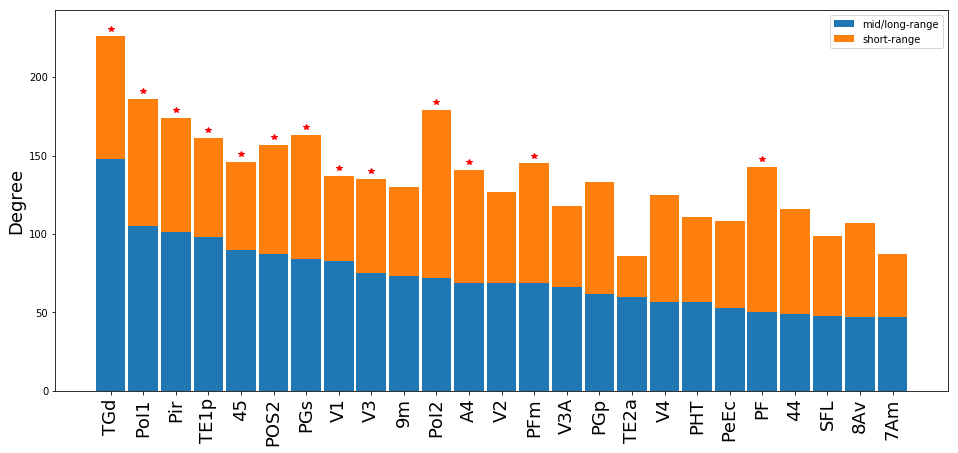

In [136]:
plt.figure(figsize=(16,7))
ind = np.arange(25)
lg = [xx[1][1] for xx in pl[0:25]]
ticks = [xx[0] for xx in pl[0:25]]
for i,roi in enumerate(ticks):
    if roi in rc_left:
        plt.plot(ind[i],pl[i][1][0]+5,'r*')
rest = [xx[1][0]-xx[1][1] for xx in pl[0:25]]
width = .91       # the width of the bars: can also be len(x) sequence
plt.xticks(ind,ticks,rotation=90,fontsize=18)
p1 = plt.bar(ind, lg, width,label='mid/long-range')
p2 = plt.bar(ind, rest, width,bottom=lg,label='short-range')
plt.legend()
plt.ylabel('Degree',fontsize=18)

In [132]:
rc_left

{'L1',
 'L106',
 'L110',
 'L131',
 'L133',
 'L148',
 'L149',
 'L15',
 'L151',
 'L167',
 'L175',
 'L5',
 'L75'}

Text(0,0.5,'Degree')

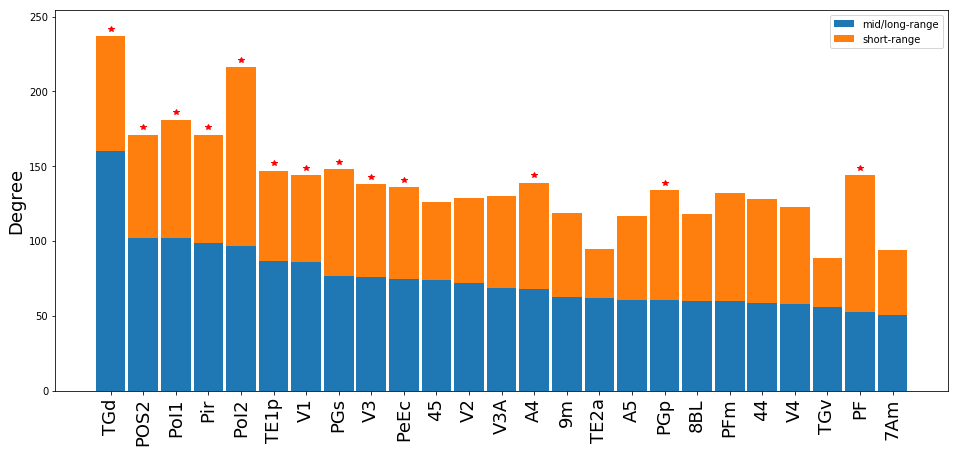

In [137]:
plt.figure(figsize=(16,7))
ind = np.arange(25)
lg = [xx[1][1] for xx in pr[0:25]]
ticks = [xx[0] for xx in pr[0:25]]
for i,roi in enumerate(ticks):
    if roi in rc_right:
        plt.plot(ind[i],pr[i][1][0]+5,'r*')
rest = [xx[1][0]-xx[1][1] for xx in pr[0:25]]
width = .91       # the width of the bars: can also be len(x) sequence
plt.xticks(ind,ticks,rotation=90,fontsize=18)
p1 = plt.bar(ind, lg, width,label='mid/long-range')
p2 = plt.bar(ind, rest, width,bottom=lg,label='short-range')
plt.legend()
plt.ylabel('Degree',fontsize=18)

In [138]:

pl1 = sorted(resl.items(),reverse=True,key=lambda x:x[1][0])
pl2 = sorted(resl.items(),reverse=True,key=lambda x:x[1][0]-x[1][1])
rank1 = np.array([(xx[0],i) for i,xx in enumerate(pl1)])
rank2 = np.array([(xx[0],i) for i,xx in enumerate(pl2)])
d1 = dict(rank1)
d2 = dict(rank2)
diff = defaultdict(int)
for w in d1:
    r1 = int(d1[w])
    r2 = int(d2[w])
    diff[w] = -r1+r2

In [143]:
sorted(diff.items(),reverse=True,key=lambda x:x[1])[0:25]

[('TE2a', 115),
 ('TE1a', 82),
 ('STGa', 65),
 ('PI', 63),
 ('7Pm', 60),
 ('7Am', 55),
 ('7PL', 55),
 ('STSva', 53),
 ('TE1m', 52),
 ('d32', 52),
 ('10d', 46),
 ('8BM', 45),
 ('a24', 45),
 ('7m', 43),
 ('TGv', 42),
 ('STSda', 41),
 ('V6', 39),
 ('a32pr', 38),
 ('p32pr', 37),
 ('p47r', 35),
 ('STSvp', 34),
 ('5L', 32),
 ('p32', 29),
 ('10pp', 28),
 ('v23ab', 27)]